In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CRIM：城镇人均犯罪率。

ZN：住宅用地超过 25000 sq.ft. 的比例。

INDUS：城镇非零售商用土地的比例。

CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）。

NOX：一氧化氮浓度。

RM：住宅平均房间数。

AGE：1940 年之前建成的自用房屋比例。

DIS：到波士顿五个中心区域的加权距离。

RAD：辐射性公路的接近指数。

TAX：每 10000 美元的全值财产税率。

PTRATIO：城镇师生比例。

B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。

LSTAT：人口中地位低下者的比例。

MEDV：自住房的平均房价，以千美元计。

In [30]:
house_df = pd.read_fwf('./housing.data',names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [31]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.696228,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,1.999689,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.073700,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.107300,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326717,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.112625,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 特征选择  经由数据的特征方差可以判断
CHAS、NOX、RM的方差值特别的小，所以采取低方差的方法对数据进行过滤  对于ZN数据感觉可用性很低，虽然方差很大但是大部分的数据都是0

In [32]:
# 低方差数据的筛选
def lowstd(data,threshold):    #简单的一个低方差筛选器，但是没有去调用这个函数
    colums = data.colums
    for item in colums:
        if data[item].std() <= threshold:
            data.drop([item],axis=1)

In [33]:
house_df = house_df.drop(labels=['CHAS','NOX','RM','ZN'],axis=1)  # 过滤数据
house_df

,CRIM,INDUS,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,11.93,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,11.93,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,11.93,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# 数据归一化or标准化处理

In [34]:
def MinMaxScaler(house_df):  # 传入数据源 进行归一化  min-max
    colums = house_df.columns
    for item in colums:
         house_df[item]=(house_df[item].max()-house_df[item].min())/(house_df[item].max()-house_df[item].min())

In [35]:
def StandardScaler(data):   # z-zeros标准化处理
    columns = data.columns
    for item in columns:
        data[item]=(data[item]-data[item].mean())/data[item].std()

In [36]:
StandardScaler(house_df)   # 最后还是选择标准化对数据进行处理，效果会更好

In [37]:
house_df.insert(0,'ones',1)  # 补充1行
house_df

,ones,CRIM,INDUS,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,-0.644418,-1.286636,-0.119895,0.196916,-2.351183,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,1,-0.636508,-0.592794,0.366803,0.635535,-1.645549,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,1,-0.636516,-0.592794,-0.265549,0.635535,-1.645549,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,1,-0.634601,-1.305586,-0.809088,1.183170,-0.939915,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,1,-0.620778,-1.305586,-0.510674,1.183170,-0.939915,-1.105022,0.112920,0.440616,-1.025487,1.486032
...,...,...,...,...,...,...,...,...,...,...,...
501,1,-0.623197,0.115624,0.018654,-0.608909,-2.351183,-0.802418,1.175303,0.386834,-0.417734,-0.014440
502,1,-0.629740,0.115624,0.288648,-0.704474,-2.351183,-0.802418,1.175303,0.440616,-0.500355,-0.210154
503,1,-0.623902,0.115624,0.796661,-0.764483,-2.351183,-0.802418,1.175303,0.440616,-0.982076,0.148655
504,1,-0.605500,0.115624,0.736268,-0.653766,-2.351183,-0.802418,1.175303,0.402826,-0.864446,-0.057932


# 对数据进行切片的操作，获取训练集和测试集

In [38]:
x_arr = house_df.iloc[:405,:-2].values
y_arr = house_df.iloc[:405,-2:-1].values
x_test = house_df.iloc[-50:-1,:-2].values
y_test = house_df.iloc[-50:-1,-1].values

# 最小二乘法

In [39]:
def standranger(x_arr, y_arr):   # 最小二乘法来获取theat的值
    x_mat = np.mat(x_arr)   # 将特征变量x数据源转为矩阵
    y_mat = np.mat(y_arr)   # 将y值转化为矩阵的形式
    x_is = x_mat.T * x_mat
    if np.linalg.det(x_is) == 0.0:
        print("矩阵是奇异矩阵")
        return 0
    ws = x_is.I * (x_mat.T * y_mat)
    return ws

In [40]:
theat = standranger(x_arr,y_arr)  # 最小二乘法
theat

matrix([[ 0.01464621],
        [ 0.07432947],
        [ 0.27368876],
        [ 0.39019468],
        [ 0.12562017],
        [-0.06392184],
        [ 0.0782238 ],
        [ 0.13907606],
        [-0.06622298]])

In [41]:
theat[0]  # 获取参数的值

matrix([[0.01464621]])

# 代价函数和梯度下降函数

In [42]:
def cost_function(X,y,theat):
    inner = np.power((X @ theat - y),2)
    return  np.sum(inner)/(2*len(X))

In [43]:
def gradint_descent(X,y,theat,altha,iters):
    costs = []
    for item in range(iters):
        theat = theat-(X.T @ (X @ theat - y))*altha/len(X)
        cost = cost_function(X,y,theat)
        costs.append(cost)
#         if iters%100 == 0:
#             print(cost)
    return theat,costs

In [44]:
theat = np.zeros((x_arr.shape[1],1))

In [45]:
altha = 0.000007
iters = 1000

In [46]:
cost_function(x_arr,y_arr,theat)

0.47598200629604254

In [47]:
def picture_cost(iters,cost):   # 绘制代价函数的曲线
    fig,ax = plt.subplots(figsize=(12,8))
    ax.plot(np.arange(iters),cost)
    ax.set_xlabel("iters")
    ax.set_ylabel("cost")
    ax.set_title("Linner Cost Function")
    plt.show()

In [48]:
theat2,cost = gradint_descent(x_arr, y_arr, theat, altha, iters)
theat2

array([[-0.00121452],
       [ 0.00255579],
       [ 0.00384448],
       [ 0.00411817],
       [-0.00305155],
       [-0.00051044],
       [ 0.00274035],
       [ 0.00229498],
       [-0.00079572]])

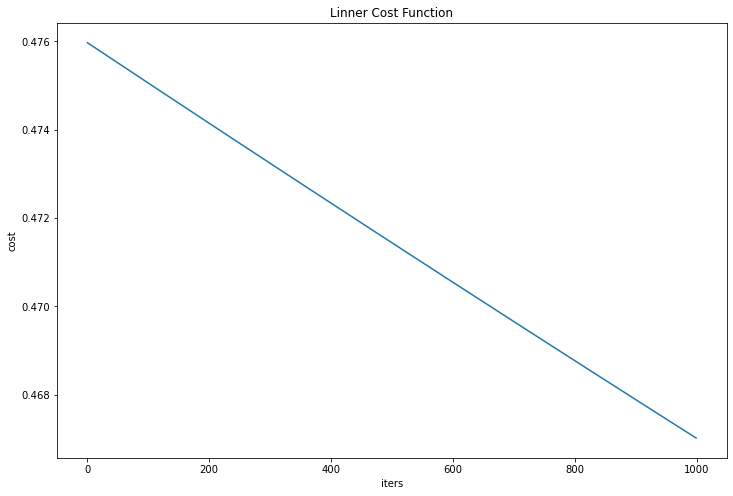

In [49]:
picture_cost(iters,cost)

# 预测函数

In [50]:
def predcit(x_text,pre_theat):
    y = x_text @ pre_theat
    return y

In [51]:
y_pre = predcit(x_test, theat2)
y_pre

array([[ 0.01923848],
       [ 0.02128605],
       [ 0.01900363],
       [ 0.01720332],
       [ 0.01752472],
       [ 0.01507211],
       [ 0.01683185],
       [ 0.01696255],
       [ 0.0150483 ],
       [ 0.00841584],
       [ 0.01736498],
       [ 0.01723193],
       [ 0.01401669],
       [ 0.00939991],
       [ 0.01430067],
       [ 0.01489505],
       [ 0.01247227],
       [ 0.01314592],
       [ 0.02084636],
       [ 0.02031327],
       [ 0.01732562],
       [ 0.01873284],
       [ 0.01366117],
       [ 0.01664115],
       [ 0.01230162],
       [ 0.01385685],
       [ 0.01404654],
       [ 0.00484297],
       [ 0.00541803],
       [ 0.00756399],
       [ 0.01423442],
       [ 0.0101578 ],
       [ 0.01942406],
       [ 0.02081947],
       [ 0.02091953],
       [ 0.02024441],
       [ 0.01758323],
       [-0.00408023],
       [-0.0056457 ],
       [-0.00836624],
       [-0.00183935],
       [-0.00233988],
       [-0.00240547],
       [-0.00124096],
       [-0.00044892],
       [ 0

In [52]:
def rmse(y_pre, y_text):
    inner = np.sum(np.power(y_text-y_pre,2))/len(y_text)
    return np.sqrt(inner)

In [53]:
rms = rmse(y_pre, y_test)

In [54]:
rms

4.294980342266845